# Анализ данных отчета (Заика Богдан)
Для начала загрузим данные и импортируем необходимые библиотеки для анализа:

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rep = pd.read_csv('dfp_kv_report.csv')
rep.head()

,period_start,advertiser_id,advertiser_name,ad_unit_id,ad_unit_code,device_category,site_name,impressions,revenue,clicks,viewable_impressions
0,1640235600,4936745737,Notsy,22148814250,AMD_MID_300c,Tablet,site_3,192,0.031870,0,93
1,1640235600,4936745737,Notsy,22148863985,AMD_BTC_336,Tablet,site_3,86,0.017450,0,44
2,1640235600,4936745737,Notsy,22149092667,AMD_BTC_300M,Tablet,site_3,8,0.000880,0,6
3,1640235600,4952234314,Yandex,22148811832,AMD_ATF_300M,Tablet,site_3,54,0.003885,0,3
4,1640235600,4952234314,Yandex,22148813575,AMD_ATF_970,Tablet,site_3,43,0.003440,0,9


## Анализ на наличие точек выбросов
Проверим наличие пустых значений и корректность типов данных в отчете:

In [3]:
rep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429832 entries, 0 to 429831
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   period_start          429832 non-null  int64  
 1   advertiser_id         429832 non-null  int64  
 2   advertiser_name       429832 non-null  object 
 3   ad_unit_id            429832 non-null  int64  
 4   ad_unit_code          429832 non-null  object 
 5   device_category       429832 non-null  object 
 6   site_name             429832 non-null  object 
 7   impressions           429832 non-null  int64  
 8   revenue               429832 non-null  float64
 9   clicks                429832 non-null  int64  
 10  viewable_impressions  429832 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 36.1+ MB


Типы данных правильные, пустые значения отсутствуют. Выведем основные статистические показатели каждого числового поля:

In [4]:
rep.describe().to_excel('descr_stats.xlsx')

С таблицы выше можно сделать следующий выводы:
* Есть подозрение на выброс данных в строках, где advertiser_id = -1.
* Как минимум 75% реклам имеют 0 нажатий по ним. Учитывая относительно низкие значения в статистиках показов и видимых показов рекламы, скорее всего это правильные данные.
* Можно проверить строку с максимальным количеством просмотров на наличие выбросов, так как разница между 3им квартилем и максимумом большая.

Начнем с осмотра строк, где advertiser_id = -1:

In [5]:
rep.loc[rep['advertiser_id'] == -1, :]

,period_start,advertiser_id,advertiser_name,ad_unit_id,ad_unit_code,device_category,site_name,impressions,revenue,clicks,viewable_impressions
6048,1640235600,-1,-,22261218894,OBZ_ITC_300M,Smartphone,site_2,1,0.000022,0,1
6705,1640235600,-1,-,22648342077,OBZ_FLOAT2_160,Desktop,site_2,1,0.000044,0,1
56444,1639544400,-1,-,22261218894,OBZ_ITC_300M,Smartphone,site_2,1,0.000000,0,0
58894,1639544400,-1,-,22261218894,OBZ_ITC_300M,Smartphone,site_2,1,0.000270,0,1
60624,1639544400,-1,-,22261218894,OBZ_ITC_300M,Smartphone,site_2,1,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
419796,1640149200,-1,-,22648342077,OBZ_FLOAT2_160,Desktop,site_2,1,0.000139,0,1
421534,1640149200,-1,-,22261218894,OBZ_ITC_300M,Smartphone,site_2,1,0.000000,0,0
421902,1640149200,-1,-,22648342077,OBZ_FLOAT2_160,Desktop,site_2,3,0.000066,0,3
422362,1640149200,-1,-,22260966388,OBZ_ITC_336,Desktop,site_2,1,0.000000,0,1


В отчете примерно 2.5% записей со значениями advertiser_id=-1 и advertiser_name="-". Возможные причины:
* advertiser_id=-1 и advertiser_name="-" означают что не найдено актуальной рекламы для посетителя сайта и показана "дефолтная" (не персонализированная) реклама для данного рекламного юнита. Для подтверждения этого предположения необходимо найти и ознакомится с описанием полей таблицы, либо уточнить у человека, который знаком с таблицей.
* Поля advertiser_id и advertiser_name заполняются такими значениями в случае ошибки при попытке логирования значений этих полей в таблицу. Для подтверждения этого предположения необходимо посмотреть файлы с логами (если известно их местонахождение), или уточнить у разработчика логирования.
 
Теперь посмотрим на строку с максимальным кол-вом просмотров:

In [6]:
rep.loc[rep['impressions'] == rep['impressions'].max(), :]

,period_start,advertiser_id,advertiser_name,ad_unit_id,ad_unit_code,device_category,site_name,impressions,revenue,clicks,viewable_impressions
250740,1639285200,46442481,AdExchange,22175521719,OBZ_ITA_300M,Smartphone,site_2,1491763,239.216634,4586,1159930


Данные выглядят правдоподобно, так как наибольшее количество просмотров принадлежат сайту с наибольшим доходом за доступный период в отчете (согласно результату 1-го задания).

Так же значение поля *revenue* в этой строке не максимальное, поэтому выведем отдельно строку с максимальным значением в revenue.

In [7]:
rep.loc[rep['revenue'] == rep['revenue'].max(), :]

,period_start,advertiser_id,advertiser_name,ad_unit_id,ad_unit_code,device_category,site_name,impressions,revenue,clicks,viewable_impressions
11637,1640235600,4949507516,Notsy,22568593742,ACD_INSTREAM,Smartphone,site_1,92869,10372.00741,1,0


Поскольку доход сайта *site_1* в рублях, его значениям свойственно быть выше остальных. Следовательно, тут выбросы тоже не замечены.

Теперь проверим наличие выбросов в текстовых полях. Для этого выведем все уникальные значения каждого текстового поля:

In [8]:
string_cols = list(rep.select_dtypes(include='object').columns)
for col in string_cols:
    print(f'>>>>>>>>>> {col} <<<<<<<<<<')
    print(rep[col].unique())
    print()

>>>>>>>>>> advertiser_name <<<<<<<<<<
['Notsy' 'Yandex' 'AdExchange' 'Notsy Video' 'Self Promo Obozrevatel'
 '5.ua' 'Квартал-Концерт' 'Network Marketgid' 'Self Promo Венето'
 'Network Mixadvert' 'Риверсайд' 'Deals RTB-House' 'Med_Oboz'
 'Deals getblue.io' 'Adtelligent' 'Network Adpartner' '-' 'Google AdSense'
 'Яндекс' 'academic' 'Adsense' 'AdExchange Display' 'Google AdExchange'
 'House Ads' 'Redllama' 'Adpartner' 'Ampliffy' 'Test_Oboz' 'Nerukhomi'
 'LuckyAds' 'phoenix' 'Network IdealMedia']

>>>>>>>>>> ad_unit_code <<<<<<<<<<
['AMD_MID_300c' 'AMD_BTC_336' 'AMD_BTC_300M' 'AMD_ATF_300M' 'AMD_ATF_970'
 'AMD_ATFR_300' 'AMD_MOB_INTERSTITIALS' 'AMD_INSTREAM' 'OBZ_FLOAT_320M'
 'OBZ_ITA_336' 'OBZ_FLOAT_160' 'OBZ_ATA_970' 'OBZ_SBR_300c' 'OBZ_BTA_336'
 'OBZ_BTC_970' 'OBZ_ITA_300M' 'OBZ_ITC_300' 'OBZ_ITC_300M'
 'OBZ_DESKTOP_VIDEO' 'OBZ_MOBILE_VIDEO' 'OBZ_BTA_300M' 'OBZ_BTC_300M'
 'OBZ_MOBILE_VIDEO_1' 'OBZ_ITC_336' 'OBZ_ITC_970' 'OBZ_ATC_970'
 'OBZ_FLOAT2_160' 'M3P_ATF_300M' 'M3P_ATF_240' 'OBZ_I

Все текстовые значения выглядят корректно.

## Анализ отчета на наличие трендов или сезонности

### Доходы за декабрь 2021 в разрезе сайтов

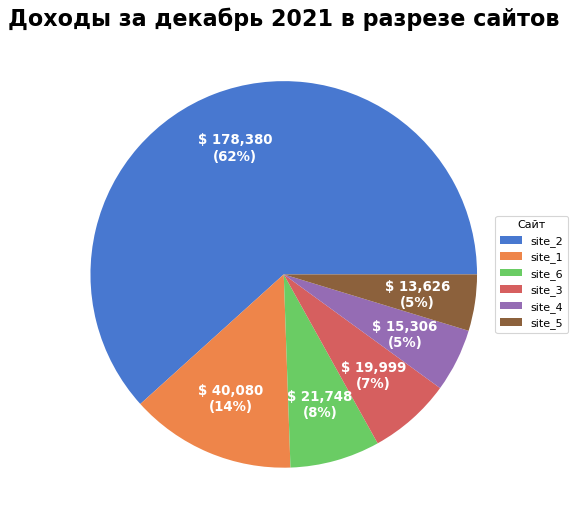

In [9]:
task1_result = pd.read_csv('task_1_result.csv')

data = task1_result['revenue_usd']
labels = task1_result['site_name']


plt.figure(figsize=(10, 8), dpi=80)
palette_color = sns.color_palette('muted')

plt.pie(
    data,
    labels=labels,
    autopct= lambda x: f'$ {x*data.sum()/100:,.0f}\n({x:.0f}%)',
    pctdistance=.7,
    textprops={'fontsize': 12, 'color':'w', 'fontweight':'bold'},
    colors=palette_color
)
plt.title(
    'Доходы за декабрь 2021 в разрезе сайтов', 
    fontdict={'fontsize': 20, 'fontweight':'heavy'}
)
plt.legend(title='Сайт',loc=7, bbox_to_anchor=(1.1, 0.5))
plt.savefig('site_revenue.png')
plt.show()

### Ежедневные показы рекламы за декабрь 2021 в разрезе сайтов

Так как кол-во показов рекламы на сайте site_2 в разы больше по сравнению с другими сайтами, построим два отдельных графика для удобства их анализа. 

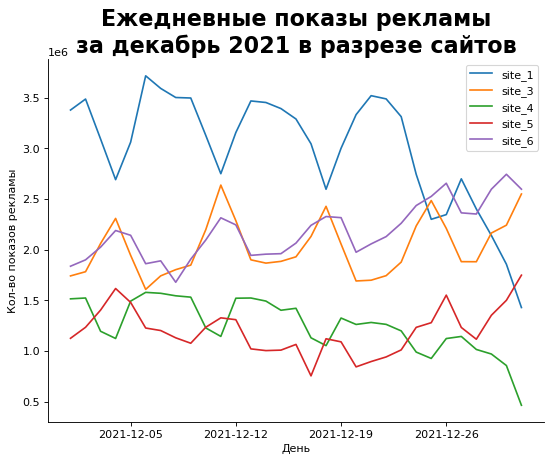

In [10]:
rep_day = pd.read_csv('dfp_kv_report_impr.csv')

plt.figure(figsize=(8, 6), dpi=80)
days = rep_day.loc[:len(rep_day)/6-1, 'period_start']
col = 'impressions'

for site in [f'site_{i+1}' for i in range(6)]:
    if site!='site_2':
        rev_per_day = rep_day.loc[rep_day['site_name']==site, col]
        plt.plot(
            days,
            rev_per_day,
            label=site
        )

plt.xticks(['2021-12-05', '2021-12-12', '2021-12-19', '2021-12-26'])
plt.title(
    'Ежедневные показы рекламы\nза декабрь 2021 в разрезе сайтов', 
    fontdict={'fontsize': 20, 'fontweight':'heavy'}
)

plt.legend()
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xlabel('День')
plt.ylabel('Кол-во показов рекламы')
plt.savefig('impressions_per_day1.png')
plt.show()

На графике выше можно заметить следующее:
* Показы рекламы на сайтах *site_3* и *site_6* имеют схожие тенденцию роста и сезонность (рост значений к концу недели, потом падение).
* Показы рекламы на сайте *site_5* имеет схожую сезонность с сайтами *site_3* и *site_6*.
* Показы рекламы на сайтах *site_1* и *site_4* имеют схожие тенденцию падения и сезонность (рост значений к средине недели, падение к концу).
* Показы рекламы на сайтах *site_1* и *site_3* имеют обратные тенденцию роста и сезонность.

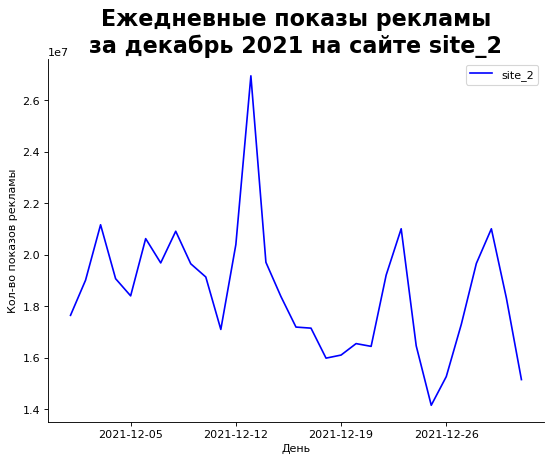

In [11]:
plt.figure(figsize=(8, 6), dpi=80)
rev_per_day = rep_day.loc[rep_day['site_name']=='site_2', col]
plt.plot(
    days,
    rev_per_day,
    label='site_2',
    color='b'
)

plt.xticks(['2021-12-05', '2021-12-12', '2021-12-19', '2021-12-26'])
plt.title(
    'Ежедневные показы рекламы\nза декабрь 2021 на сайтe site_2', 
    fontdict={'fontsize': 20, 'fontweight':'heavy'}
)

plt.legend()
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xlabel('День')
plt.ylabel('Кол-во показов рекламы')
plt.savefig('impressions_per_day2.png')
plt.show()

Показы рекламы на сайте site_2 имеют тенденцию падения.

### 5 наиболее эффективных рекламных юнитов за декабрь 2021
 
Выберем метрику для определения лучших рекламных юнитов. Судя по данным, реклама может быть в 3ех статусах: "Показана на сайте" (*impressions*), "Пользователь увидел рекламу" (*viewable_impressions*) и "Пользователь нажал на рекламу" (*clicks*). Нам важно чтобы пользователь видел рекламу и был заинтересован ею (нажимал на рекламу). Так же необходимо учесть что каждый сайт обладает реальной популярностью, поэтому стоит выбрать метрику, которая рассчитывает качество рекламы, а не ее количество. Учитывая вышесказанное, предлагаю использовать следующую метрику для нахождения лучших рекламных юнитов:

$Efficiency = 2 \cdot \frac{visibility*clickability}{visibility+clickability}$, где

$Visibility = \frac{\sum viewable\_impressions}{\sum impressions}$

$Clickability = \frac{\sum clicks}{\sum viewable\_impressions}$

Благодаря использованию среднего гармонического, значение метрики *Efficiency* будет высоким только при одновременно высоких значениях *Visibility* и *Clickability*.

In [12]:
rep_qual = rep.loc[:, ['ad_unit_code', 'impressions', 'viewable_impressions', 'clicks']]

rep_qual = rep_qual.groupby(
    by='ad_unit_code'
).sum()

rep_qual['visibility'] = rep_qual['viewable_impressions'] / rep_qual['impressions']
rep_qual['clickability'] = rep_qual['clicks'] / rep_qual['viewable_impressions']
rep_qual['efficiency'] = 2 * rep_qual['visibility'] * rep_qual['clickability'] / (rep_qual['visibility'] + rep_qual['clickability'])

rep_qual = rep_qual.sort_values('efficiency', ascending=False)
top5_ad_units = rep_qual.head()

top5_ad_units

,impressions,viewable_impressions,clicks,visibility,clickability,efficiency
ad_unit_code,,,,,,
ACD_WEB_INTERSTITIAL,9013,8804,2291,0.976811,0.260223,0.410964
OBZ_INTERSTITIAL,2251024,2163905,145524,0.961298,0.067251,0.125707
OBZ_BTC_970,3523329,805432,12947,0.228600,0.016075,0.030037
M3P_ATF_300M,25254180,12562412,149498,0.497439,0.011900,0.023245
AMD_WEB_INTERSTITIAL,10220,9822,113,0.961057,0.011505,0.022737


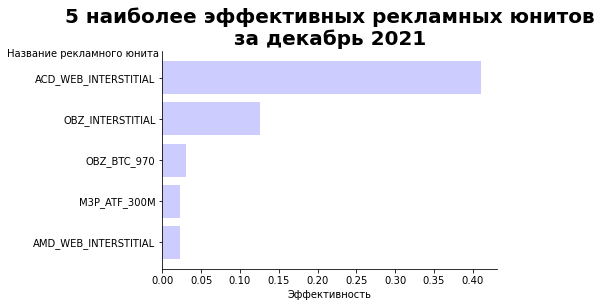

In [13]:
plt.barh(
    top5_ad_units.index[::-1], 
    top5_ad_units['efficiency'][::-1],
    color='b',
    alpha=.2
)

plt.xlabel('Эффективность')
plt.text(-.2,4.5,'Название рекламного юнита')
plt.title(
    '5 наиболее эффективных рекламных юнитов\nза декабрь 2021', 
    fontdict={'fontsize': 20, 'fontweight':'heavy'}
)

sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('top5_ad_unit.png')
plt.show()

Проанализировав эти рекламные юниты можно найти причины их эффективности и использовать получение знания при создании новых рекламных юнитов.

## Выводы
В ходе проведенного анализа получили следующие результаты:
* Найдены возможные выбросы в данных: строки с advertiser_id=-1 и advertiser_name="-". Необходимо проверить выдвинутые предположения, касательно причины таких значений:
    * advertiser_id=-1 и advertiser_name="-" означают что не найдено актуальной рекламы для посетителя сайта и показана "дефолтная" (не персонализированная) реклама для данного рекламного юнита. Для подтверждения этого предположения необходимо найти и ознакомится с описанием полей таблицы, либо уточнить у человека, который знаком с таблицей.
    * Поля advertiser_id и advertiser_name заполняются такими значениями в случае ошибки при попытке логирования значений этих полей в таблицу. Для подтверждения этого предположения необходимо посмотреть файлы с логами (если известно их местонахождение), или уточнить у разработчика логирования.
* *site_2* оказался наиболее доходным среди сайтов за декабрь 2021 собрав 178380 \$ (62\% от общего дохода).
* Тенденции и сезонности ежедневных показов рекламы за декабрь 2021:
    * Показы рекламы на сайтах *site_3* и *site_6* имеют схожие тенденцию роста и сезонность (рост значений к концу недели, потом падение).
    * Показы рекламы на сайте *site_5* имеет схожую сезонность с сайтами *site_3* и *site_6*.
    * Показы рекламы на сайтах *site_1* и *site_4* имеют схожие тенденцию падения и сезонность (рост значений к средине недели, падение к концу).
    * Показы рекламы на сайтах *site_1* и *site_3* имеют обратные тенденцию роста и сезонность.
    * Показы рекламы на сайте site_2 имеют тенденцию падения.
* Проанализировав следующие 5 наиболее эффективные рекламные юниты, можно найти причины их эффективности и использовать получение знания при создании новых рекламных юнитов:
    * ACD_WEB_INTERSTITIAL
    * OBZ_INTERSTITIAL
    * OBZ_BTC_970
    * M3P_ATF_300M
    * AMD_WEB_INTERSTITIAL